# GeoSeries attributes and methods I

## Shapely attributes and Methods

Geopandas memiliki method dan atribut yang berguna dari Shapely packages.
- `Geoseries.area` menghasilkan area dari tiap geometru dalam sebuah Geoseries
- `Geoseries.centroid` menghasilkan center point dari tiap geometry dalam GeoSeries
- `GeoSeries.distance(other)` menghasilkan jarak minimum dari lainnya

In [1]:
import geopandas as gpd

In [2]:
schools_districts = gpd.read_file('school_districts.geojson')

In [3]:
type(schools_districts.geometry)

geopandas.geoseries.GeoSeries

### Geoseries.area

- menghasilkan area dari tiap geometry dalam sebuah Geoseries

In [4]:
print(schools_districts.head())

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   
3        Anna  Hermitage  37076          anna.shepherd@mnps.org    TN   
4         Amy  Nashville  37221             amy.frogge@mnps.org    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San Marcos Drive      Member       2018        2   
3  Shepherd     4545 Raccoon Trail       Chair       2018        4   
4    Frogge  7237 Riverfront Drive      Member       2016        9   

          phone                                           geometry  
0  615-268-5269  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
1 

In [5]:
print('There are', schools_districts.shape[0], 'school.districts.')

There are 9 school.districts.


In [6]:
# calculate area of each school district
district_area = schools_districts.area

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_10108\1845635677.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_area = schools_districts.area


In [7]:
#print area dan crs used
print(district_area.sort_values(ascending = False))

0    0.036641
4    0.023030
8    0.015004
1    0.014205
3    0.014123
5    0.010704
2    0.008328
7    0.007813
6    0.006415
dtype: float64


In [8]:
print(schools_districts.crs)

EPSG:4326


satuan jarak untuk suatu geometri bergantung pada sistem referensi koordinatnya. Untuk EPSG 4326 mengguanakn Decimal Degree untuk jarak. Jadi satuan luas yang digunakan adalah Decimal Degree Kuadrat. Namun untuk memudahkan interpretasi kepada banyak orang akan lebih baik menggunakan satuan yang lebih umum seperti kilometer kuadrat. Untuk mengubah satuan ini dapat dilakukan dengan melakukan pengubahan sistem koordinat. 

In [9]:
schools_districts_3857 = schools_districts.to_crs(epsg = 3857)

In [10]:
# define a variable for m^2 to km^2 and get kilometers suqared
sqm_to_sqkm = 10**6

In [11]:
district_area_km = schools_districts_3857.area / sqm_to_sqkm

In [12]:
print(district_area_km.sort_values(ascending = False))

0    563.134380
4    353.232132
8    230.135653
1    218.369949
3    216.871511
5    164.137548
2    127.615396
7    119.742279
6     98.469632
dtype: float64


In [13]:
print(schools_districts_3857.crs)

EPSG:3857


### Exercise 

**Find the area of the Urban Residents neighborhood**

How big is the Urban Residents neighborhood?

- Print the urban polygon and notice the units of each longitude/latitude pair.
- Create urban_poly_3857 by calling to_crs() on urban_polygon and print the head again. Notice the units of each longitude/latitude pair have changed.
- Print the area of urban_poly_3857. Remember to divide by 10**6 to get kilometers squared.

In [14]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('neighborhoods.geojson')

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

In [15]:
# Print the head of the urban polygon
print(urban_polygon.head())

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...


In [16]:
# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg=3857)
print(urban_poly_3857.head())

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...


In [17]:
# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area / 10**6
print('The area of the Urban Residents neighborhood is ', area.values, ' km squared')

The area of the Urban Residents neighborhood is  [1.12898961]  km squared


> The Urban Residents neighborhood is around 1.13 square km. That seems manageable for walking to see the public art!

## GeoSeries attributes and methods II

### Geoseries.centroid

 Salah satu atribut GeoSeries yaitu .centroid adalah atribut yang digunakan untuk menemukan titik pusat geometri.

In [18]:
schools_districts.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


In [19]:
schools_districts['center'] = schools_districts.geometry.centroid

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_10108\3472801044.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  schools_districts['center'] = schools_districts.geometry.centroid


In [20]:
part = ['district', 'center']

In [21]:
schools_districts_center  = schools_districts[part]

In [22]:
schools_districts_center.head(3)

,district,center
0,1,POINT (-86.86087 36.26282)
1,3,POINT (-86.72361 36.28516)
2,2,POINT (-86.70156 36.03021)


### Geoseries.distance()

Selain itu  salah satu atribut GeoSeries yaitu .distance adalah atribut yang digunakan untuk menemukan jarak minimum 

In [23]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Membuat beberapa titik (Point) dalam Geoseries
points = [
    Point(0, 0),    # Titik 1
    Point(3, 4),    # Titik 2
    Point(1, 1),    # Titik 3
    Point(5, 2),    # Titik 4
    Point(2, 3),    # Titik 5
]

# Membuat Geoseries dari titik-titik
gs = gpd.GeoSeries(points)

# Inisialisasi DataFrame untuk hasil jarak
jarak_df = pd.DataFrame(index=range(len(points)), columns=range(len(points)))

# Menghitung jarak antara semua pasangan titik dalam Geoseries
for i in range(len(points)):
    for j in range(len(points)):
        jarak_df.iat[i, j] = gs[i].distance(gs[j])

print(jarak_df)

          0         1         2         3         4
0       0.0       5.0  1.414214  5.385165  3.605551
1       5.0       0.0  3.605551  2.828427  1.414214
2  1.414214  3.605551       0.0  4.123106  2.236068
3  5.385165  2.828427  4.123106       0.0  3.162278
4  3.605551  1.414214  2.236068  3.162278       0.0


### Exercise

**The center of the Urban Residents neighborhood**

Now you'll find the center point of the urban_poly_3857 and plot it over the polygon.

- Create downtown_center, from urban_poly_3857 using the GeoSeries centroid attribute.
- Print the datatype of downtown_center.
- Plot urban_poly_3857 as ax using lightgreen for the color.
- Plot the downtown_center, setting ax = ax and color = black. The x-axis ticks are rotated for you. We've included the code to show the plot.

In [24]:
import matplotlib.pyplot as plt

<class 'geopandas.geoseries.GeoSeries'>


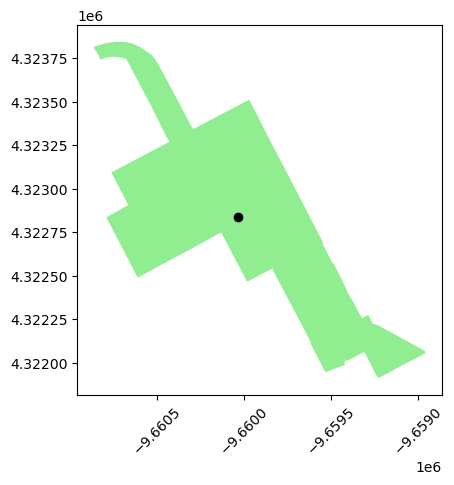

In [25]:
# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

> You can see the centroid of the Urban Residents neighborhood. Notice that latitude and longitude are in meters instead of degrees. In the next exercise you will calculate the distance in meters of each artwork from the centroid of the Urban Residents neighborhood.

**Prepare to calculate distances**

In this exercise you will prepare a GeoDataFrame called art_dist_meters with the locations of downtown art converted to meters using EPSG:3857. You will use art_dist_meters in the next exercise to calculate the distance of each artwork from the center of the Urban Residents neighborhood in meters.

The art data has been pre-loaded for you, along with urban_poly_3857 and center_point, the center point of the Urban Residents neighborhood. A geometry column called geometry that uses degrees has already been created in the art DataFrame.

- Create a GeoDataFrame called art_dist_meters, using the art DataFrame and the geometry column from art. Set crs = {'init': 'epsg:4326'} since the geometry is in decimal degrees. Print the first two rows.
- Now explicitly set the coordinate reference system to EPSG:3857 for art_dist_meters by using to_crs(). Print the first two rows again.
- Add a column called center to art_dist_meters, setting it equal to center_point for every row .

In [26]:
from shapely.geometry import Point

art = gpd.read_file('public_art.csv')
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
center_point = art.geometry.centroid

In [27]:
# Import packages
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN          Sculpture              36.16234   

   Longitude        Mapped Location                    geometry  
0   -86.8366   (36.12856, -86.8366)  POINT (-86.83660 36.12856)  
1  -86.77774  (36.16234, -86.77774)  POINT (-86.77774 36.16234)  
                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN    

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


> Well done! The art_dist_meters Data Frame has the location of each artwork and the center point of the Urban Residents neighborhood -- both using meters for distance.

**Art distances from neighborhood center**

Now that you have the center point and the art locations in the units we need to calculate distances in meters, it's time to perform that step.

- Import the package to help with pretty printing.
- Create a dictionary, art_distances by iterating through art_dist_meters, using title as the key and the distance() from center as the value. Pass center as the other argument to GeoSeries.distance().
- Pretty print art_distances using the pprint method of pprint

In [28]:
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(other=ctr)
    
# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 10583948.500651473,
 'A Splash of Color': 10585357.16017826,
 'A Story of Nashville': 10583565.969078569,
 'Aerial Innovations Mural': 10579929.255218184,
 'Airport Sun Project': 10570311.412935875,
 'Andrew Jackson': 10583951.468665037,
 'Angel': 10588435.041707948,
 'Anticipation': 10583698.952539692,
 'April Baby': 10586916.00892881,
 'Arial Triangle [from the Gravity Series]': 10583398.524837973,
 'Ariel': 10585905.336208295,
 'Athena Parthenos': 10586065.827814262,
 'Benedictio': 10577769.979416678,
 'Bicycle Bus-Green Fleet': 10582635.68286198,
 'Blowing Bubbles': 10588435.041707948,
 'Breaking Bread': 10582634.392548595,
 'Building a Positive Community': 10582136.29114304,
 'Can-Do': 10582120.049094511,
 'Chet Atkins': 10583602.67968694,
 "Children's Chairs For The Seasons": 10583565.969078569,
 'Confederate Memorial': 10577769.979416678,
 'Confederate Private Monument': 10585868.029575413,
 'Confluence': 10585513.082652403,
 'Cool Fences': 10579074.34680

> Great work! You can see each art title and its distance in meters from the center of the Urban Residents neighborhood.

# Working with Folium

### Folium

Folium adalah sebuah perpustakaan (library) Python yang digunakan untuk membuat peta interaktif dengan memanfaatkan library Leaflet. Perpustakaan ini memungkinkan Anda untuk membuat peta yang dapat di-zoom, di-scroll, dan di-interaksi oleh pengguna. Dalam konteks pemrograman geospasial, Folium sangat berguna untuk visualisasi data geografis, seperti titik-titik lokasi, garis, poligon, dan layer-layer lainnya di atas peta.

Berikut adalah beberapa fitur dan konsep utama yang terkait dengan Folium:

- **Pemetaan Peta:** Folium memungkinkan Anda membuat peta dengan berbagai jenis tampilan, termasuk peta jalan, citra satelit, dan tampilan topo. Anda dapat dengan mudah menyesuaikan tampilan peta ini sesuai dengan kebutuhan Anda.

- **Marker dan Pop-up:** Anda dapat menambahkan marker (penanda) ke peta untuk menunjukkan lokasi tertentu. Anda juga dapat menyertakan pop-up untuk memberikan informasi lebih lanjut ketika marker di-klik.

- **Circles dan Polygons:** Anda dapat membuat lingkaran (circles) atau poligon untuk menyoroti area atau wilayah tertentu di peta.

- **Choropleth Maps:** Folium mendukung pembuatan peta choropleth yang memungkinkan Anda untuk memvisualisasikan data numerik pada tingkat geografis seperti negara, provinsi, atau kota.

- **Clustered Markers:** Jika Anda memiliki banyak marker, Folium memungkinkan Anda untuk mengelompokkannya dalam cluster agar lebih mudah dikelola dan di-zoom.

- **Plugin dan Ekstensi:** Folium mendukung berbagai plugin dan ekstensi yang memperluas fungsionalitasnya. Misalnya, Anda dapat menggunakan plugin untuk menampilkan jalur perjalanan, menggambar poligon, atau menambahkan informasi cuaca ke peta.

- **Integrasi dengan Pandas:** Folium dapat berintegrasi dengan perpustakaan Pandas, memungkinkan Anda untuk dengan mudah menghubungkan data geospasial Anda dengan data dalam Pandas DataFrame.

- **Ekspor HTML/JavaScript:** Anda dapat menyimpan peta yang Anda buat dengan Folium dalam format HTML atau JavaScript, sehingga dapat dibagikan dan dilihat di berbagai platform.

Berikut adalah contoh sederhana penggunaan Folium untuk membuat peta:

In [29]:
# pip install folium

### folium.Map()

In [30]:
import folium

In [32]:
# Membuat objek peta
eiffel_tower = folium.Map(location=[48.8583, 2.2922])

# display the map
display(eiffel_tower)

### Setting the Zoom Level

In [33]:
import folium

In [34]:
# Membuat objek peta
eiffel_tower = folium.Map(location=[48.8583, 2.2922], zoom_start= 12)

# display the map
display(eiffel_tower)

### Exercise 

**Create a folium location from the urban centroid**

In order to construct a folium map of the Urban Residents neighborhood, you need to build a coordinate pair location that is formatted for folium.

- Print the head of urban_polygon.
- Store the first occurrence of center as urban_center and print urban_center. This has been done for you.
- Create an array from urban_center that reverses the order of longitude and latitude. Call this urban_location.
- Print urban_location. This has been done for you.

In [41]:
urban_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
# Print the head of the urban_polygon
print(urban_polygon.head())

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...


In [43]:
# Create urban_center from the urban_polygon center
urban_center = urban_polygon.to_crs(epsg=4326).centroid

# Print urban_center
print(urban_center)

41    POINT (-86.77756 36.16128)
dtype: geometry


C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_10108\839430892.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_center = urban_polygon.to_crs(epsg=4326).centroid


In [44]:
# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

[41    36.161278
dtype: float64, 41   -86.777565
dtype: float64]


> Folium locations are arrays with latitude first. You just created a folium location from the center of the Urban Residents neighborhood.

**Create a folium map of downtown Nashville**

In this exercise you will create a street map of downtown Nashville using folium.

- Construct a folium map called downtown_map. Use the urban_location array you created in the previous exercise and set the initial zoom level to 15.
- Display your folium map object with the provided display function.

In [48]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)

# Display the map
downtown_map.save('downtown_map.html')

downtown_map

> You've created a map of Nashville's downtown area with Folium. Next we'll add to that map.

**Folium street map of the downtown neighborhood**

This time you will create the folium map of downtown and add the Urban Residents neighborhood area from urban_polygon. The urban_polygon has been printed to your console.

- Create an array called folium_loc from urban_polygon.center
- Create a folium map called downtown_map. Set the location argument equal to folium_loc and initialize the map with a zoom_start of 15.
- Pass the geometry from the urban_polygon GeoDataFrame to the folium.GeoJson() method. Then call add_to() on that.

In [49]:
urban_polygon['center'] = urban_polygon.loc[:, 'geometry'].centroid

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_10108\4128752981.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_polygon['center'] = urban_polygon.loc[:, 'geometry'].centroid
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [51]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center
folium_loc = [point.values.y, point.values.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15, width=500, height=500)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

downtown_map.save('downtown_map2.html')

downtown_map

> Excellent! You put everything together to create a folium map with the Urban Residents neighborhood polygon drawn on top of it.


# Creating markers and popups in Folium

### Exercise

**Adding markers for the public art**

Now that you have added the polygon for the Urban Residents neighborhood to your folium street map, it's time to add the locations of the art within the neighborhood. You can do that by creating folium markers. Each marker needs a location assigned. Use iterrows() to loop through the data to grab the values you need.

- First take a look at the tuple returned by iterrows() by printing the first and second values.
- Assign the second value of the iterrows() tuple to row_values. Create a location formatted for folium, use it to build a marker, and add it to the downtown_map.
- Display the map.

In [52]:
# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art.geometry)

# Spartially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op='within')

# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [54]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
    print('first part: ', row[0])
    print('second part: ', row[1])
    
# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    marker = folium.Marker(location=location)
    marker.add_to(downtown_map)

downtown_map.save('downtown_map3.html')    

downtown_map

first part:  1
second part:  Title                [Fourth and Commerce Sculpture]
Last Name                                     Walker
First Name                                       Lin
Location           333 Commerce Street, Nashville TN
Medium                                              
Type                                       Sculpture
Description                                         
Latitude                                    36.16234
Longitude                                  -86.77774
Mapped Location                (36.16234, -86.77774)
geometry                  POINT (-86.77774 36.16234)
index_right                                       41
name                                 Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name                                                      Greg
Location               

> Nicely done! You have created a folium map of downtown Nashville, a polygon showing the Urban Residents neighborhood, and markers to show the location of the artworks. All that's left is to create some popups for the markers!

**Troubleshooting data issues**

You will be building popups for the downtown art using the title and desc columns from the urban_art DataFrame. Here, you will inspect those columns to identify and clean up any problematic values.

- Print and inspect the values in the title column of the urban_art DataFrame.
- Print and inspect the values in the desc column of the urban_art DataFrame.
- Use the fillna() method to replace the NaN values in the desc column with empty strings, and use .str.replace to replace the apostrophes (') with back-ticks (`).
- Print the descriptions again to verify your work.

In [55]:
# Print the urban_art titles
print(urban_art.Title)

# Print the urban_art description
print(urban_art.Description)

# Replace Nan and ' values in description
urban_art.Description.fillna('', inplace=True)
urban_art.Description.str.replace("'", "`")

# Print the urban_art descriptions again
print(urban_art.Description)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_10108\1203084515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_art.Description.fillna('', inplace=True)


> Yes! Now that the data cleanup is done, it's time to build your marker popups!

**A map of downtown art**

Now you will assign a popup to each marker to give information about the artwork at each location. In particular you will assign the art title to the popup for each marker. You will do so by creating the map object downtown_map, then add the popups, and finally use the display function to show your map.

One warning before you start: you'll need to ensure that all instances of single quotes (') are removed from the pop-up message, otherwise your plot may not render!

- For each row in urban_art, build a popup message that includes the title for the corresponding artwork.
- Complete the code to replace all instances of single quotes (') with backticks (`) in the popup messages.
- Display the finished map.

In [57]:
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['Title']))
    
    marker = folium.Marker(location = location, popup=popup)
    marker.add_to(downtown_map)

downtown_map.save('downtown_map4.html')
# Display the map.
downtown_map

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\folium\utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\folium\utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\folium\utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


> Well done! Your map of public art in the Downtown Residents neighborhood is complete with a street map, markers to show the art is located, and popups that give more information about each artwork.